# Capstone Project - The Battle of the Neighborhoods (Week 5)
# Applied Data Science Capstone Course 

# Table of contents


<ol>
<li>Part 1 - Introduction: Business Problem</li>
<li>Part 2 - Data Section</li>
<li>Part 3 - Methodology</li>
<li>Part 4 - Analysis</li>
<li>Part 5 - Results</li>    
<li>Part 6 - Conclusion</li>    
</ol>



# Part 1 - Introduction: Business Problem
Imagine that you are a traveller who loves Japanese food. And, you you will visit NY city and Toronto in the upcoming days. This study will allow you to find the city holding the major number of Japanese restaurants. 

Or... imagine that you are a highly skilled sushiman wanting to move over and work in a big city in North America. You want to know what city you will find more job work opportunities as a sushiman. 

It is well known that both New York and Toronto cities have a large number of immigrants and, by using this study we will be able to identify what city has more japanese restaurants. And, besides immigrants, local people may like japanese food also and this way justify the number of japanese restaurants. 

So, in summary, the goal of this study is to identify in what city you will find more opportunities to find a japanese restaurant. Besides the numbers, it will be provided additional information and maps to justify the chosen city. Of course, this study reflects current information and it may be used in the future to get more updated information.

## Business goal

The goal of this study is to identify between New York and Toronto cities, where you are most likely to find Japanese restaurants. This study may be useful for travellers (that like japanese food of course) as well as sushimen professionals trying to find the best city to live and work. For them, the more japanese restaurants in the city, more job opportunities they will have.


## Target Audience
This study may be used by anyone interested in Japanese food. No matter if you are a local, traveller or a sushiman looking for a new job and a new city to work. 

![A test image](japanese-food-doodles_23-2147516965.png)]

# Part 2 - Data Section
Following data sources will be used to get the required information:

<ol>
<li>Wikipedia will be used scrap Toronto and New York neighborhoods;</li>
<li>Geocoder will be used to get Latitude and Longitude information;</li>
<li>Foursquare API will be used to get restaurants data related to these 2 cities.</li>
</ol>

Above data sources will be used to get venues and japanese restaurants information in order to identify in what city we have more Japanese restaurants and, this way, more opportunities for travellers and professionals. 

## Data flow

<ol>
<li>First, it is used data from get_city_opendata  to get cities information as well as latitude and longitude coordinates</li>
<li>Then, for both New York and Toronto cities, it is created two dataframes with borough and neighbourhood information. For Toronto, it is used Wikipedia to get the list of Postal Code of all Neighbourhoods in Toronto </li>
<li>And. for every neighbourhood in both dataframes, it will be gathered the list of restaurants from Foursquare. With this information it is possible to come up with a total as well as draw the maps with japanese restaurants location. </li>


## Import Libraries

In [1]:
!pip install geopy
#!pip install requests beautifulsoup4 html5lib lxml

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge lxml --yes
import lxml 

#!pip install shapely
!conda install -c conda-forge shapely --yes
import shapely.geometry

#!pip install pyproj
!conda install -c conda-forge pyproj --yes
import pyproj

import math
import pickle

print('Libraries imported.')

     |████████████████████████████████| 122kB 6.3MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-3.8.0                 |           py36_0         3.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               conda-forge/linux-64::lxml-3.8.0-py36_0



lxml-3.8.0           | 3.8 MB    | ##################################### | 100% 
libxslt-1.1.33       | 426 KB    | ##################################### | 100% 
Preparing transaction: done
Ver

## Define Foursquare Credentials and Version

In [2]:
#CLIENT_ID = 'O0JRD5QQRARPTBI0UHXGAHKL1V0VJVM03J33CVTBACTZ4W41' # your Foursquare ID
CLIENT_ID = 'SD4QNAP55YE2RIPN0CAIWY0R10R150KPJ0MGCLSZVE43BGIP' # your Foursquare ID

#CLIENT_SECRET = 'IGKCD5WQTPXRSDY2XZS11HHNJT3I0MPLKPJVLP4114SF3QMG' # your Foursquare Secret
CLIENT_SECRET = 'QINA2FJEX23L0FPF30AJ2EPF5N4X5GGKZF4NVM5NK33LXLVH' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

# Part 3 - Methodology

The goal of this project is to come up with a simple study to identify between 2 of the biggest cities in the world, which one have more japanese restaurantes and, this way, more job market for japanese-food professionals as well as travellers that love japanese food.
The main idea is to know the boroughs and neighbourhoods of both cities, New York and Toronto, and in the sequence, for each neighbourhood, this study will identify all japanese restaurants. 


After that, it will be presented some number to justify the decision about what city has a better job market and more offers for travellers wishing to have good time with delicious japanese plates.

And finally, in the last part of this study, it is showed two maps showing the spots where these japanese restaurants are located. These maps have the full address and this way it is easier for anyone to quick spot where to find those restaurants. 

# Part 4 - Analysis

First, it is identified some basic geogrpahic info from the two cities.
## Get geo info from Toronto and NY cities

In [3]:
# Get geo info from Toronto and NY cities
def get_city_opendata(city, country):
    tmp = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=worldcitiespop&q=%s&sort=population&facet=country&refine.country=%s'
    cmd = tmp % (city, country)
    res = requests.get(cmd)
    dct = json.loads(res.content)
    out = dct['records'][0]['fields']
    return out

df_NYC= get_city_opendata('New York', 'us')
df_TOR= get_city_opendata('Toronto', 'ca')

print('NY City population is: ', df_NYC['population'])
print('Toronto population is: ', df_TOR['population'])

NY City population is:  8107916
Toronto population is:  4612187


In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
ny_neighborhoods_data = newyork_data['features']

In [5]:
# get NY neighborhood
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)

for data in ny_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighbourhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

ny_neighborhoods.sort_values(by=['Borough', 'Neighbourhood'], ascending=True, inplace=True)
ny_neighborhoods.reset_index(drop=True, inplace=True)

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_neighborhoods['Borough'].unique()),
        ny_neighborhoods.shape[0]
    )
)

ny_neighborhoods.head()

# ny_neighborhoods.info()
# ny_neighborhoods['Borough'].unique()
# ny_neighborhoods Data frame with NY neighborhood.

The dataframe has 5 boroughs and 306 neighborhoods.


,Borough,Neighbourhood,Latitude,Longitude
0,Bronx,Allerton,40.865788,-73.859319
1,Bronx,Baychester,40.866858,-73.835798
2,Bronx,Bedford Park,40.870185,-73.885512
3,Bronx,Belmont,40.857277,-73.888452
4,Bronx,Bronxdale,40.852723,-73.861726


## New York City Boroughs and Neighbourhoods

In [6]:
colors = { 
 'Staten Island': 'blue',
 'Queens': 'green',
 'Manhattan': 'orange',
 'Brooklyn': 'purple',
 'Bronx': 'red',
}

ny_map = folium.Map(location=[df_NYC['latitude'], df_NYC['longitude']], zoom_start=11)

for _, neigh in ny_neighborhoods.iterrows():
    if neigh['Borough'] in colors.keys():
        folium.Marker(
            #popup=neigh['Neighbourhood'], parse_html=True,
            location=[neigh['Latitude'], neigh['Longitude']],    
            popup=folium.Popup(neigh['Borough'] + ', ' + neigh['Neighbourhood'], parse_html=True, max_width=120),
            icon=folium.Icon(color=colors[neigh['Borough']])            
        ).add_to(ny_map)
ny_map               


In [7]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0, keep_default_na=False)

headings = ['Postal Code', 'Borough', 'Neighborhood']
for table in tables:
    current_headings = table.columns.values[:3]
    if len(current_headings) != len(headings):
        continue
    if all(current_headings == headings):
        break

#table['Country name'].replace({r'.*!(.*)': r'\1'}, regex=True, inplace=True)
table[headings].to_csv('test.txt', sep=';', header=False, index=False)
tor_neighborhoods = table

In [8]:
# Verify how many rows have Borough=Not Assigned
tor_neighborhoods_NA=table[table['Borough']=='Not assigned']
tor_neighborhoods_NA.shape

# Drop rows that have Borough=Not Assigned
indexTable=tor_neighborhoods[tor_neighborhoods['Borough']=='Not assigned'].index
tor_neighborhoods.drop(indexTable, inplace=True)

#get the file with coordinates
!wget -q -O 'Geospatial_Coordinates.csv'  http://cocl.us/Geospatial_data
locCoord = pd.read_csv('Geospatial_Coordinates.csv')
locCoord.columns=['Postal Code','Latitude','Longitude']

In [9]:
toronto_neighborhoods = pd.merge(tor_neighborhoods,
                 locCoord[['Postal Code','Latitude', 'Longitude']], sort=False,
                 on='Postal Code')

del toronto_neighborhoods['Postal Code']
toronto_neighborhoods.columns=column_names
toronto_neighborhoods.sort_values(by=['Borough', 'Neighbourhood'], ascending=True, inplace=True)
toronto_neighborhoods.reset_index(drop=True, inplace=True)

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_neighborhoods['Borough'].unique()),
        toronto_neighborhoods.shape[0]
    )
)

toronto_neighborhoods.head()

# toronto_neighborhoods.info()
# toronto_neighborhoods['Borough'].unique()
# toronto_neighborhoods Data frame with Toronto neighborhood.

The dataframe has 10 boroughs and 103 neighborhoods.


,Borough,Neighbourhood,Latitude,Longitude
0,Central Toronto,Davisville,43.704324,-79.388790
1,Central Toronto,Davisville North,43.712751,-79.390197
2,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
3,Central Toronto,Lawrence Park,43.728020,-79.388790
4,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


## Toronto Boroughs and Neighbourhoods

In [10]:
colors = { 
    'Central Toronto': 'lightblue',
    'Downtown Toronto': 'green',
    'East Toronto': 'lightgreen',
    'West Toronto': 'purple',
    'East York': 'red',
    'Etobicoke': 'beige',
    'Mississauga': 'blue',
    'North York': 'orange',
    'Scarborough': 'darkblue',
    'York': 'darkpurple',
}

tor_map = folium.Map(location=[df_TOR['latitude'], df_TOR['longitude']], zoom_start=11)

for _, neigh in toronto_neighborhoods.iterrows():
    if neigh['Borough'] in colors.keys():
        folium.Marker(
            #popup=neigh['Neighbourhood'], parse_html=True,
            location=[neigh['Latitude'], neigh['Longitude']],    
            popup=folium.Popup(neigh['Borough'] + ', ' + neigh['Neighbourhood'], parse_html=True, max_width=120),
            icon=folium.Icon(color=colors[neigh['Borough']])            
        ).add_to(tor_map)
tor_map     

Now, it is defined a way to fill in two dataframes with information from Foursquare. In these two dataframes (one for Toronto and the other for New York) it is stored all restaurants information that is used in this study.
## Mechanism to get japanese restaurants info from Foursquare

In [11]:
# Category IDs corresponding to japanese restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues
japanese_restaurant_categories = ['4bf58dd8d48988d111941735','55a59bace4b013909087cb0c','55a59bace4b013909087cb30',
                                 '55a59bace4b013909087cb21','55a59bace4b013909087cb06','55a59bace4b013909087cb1b',                                  
                                 '55a59bace4b013909087cb1e','55a59bace4b013909087cb18','55a59bace4b013909087cb24',                                  
                                 '55a59bace4b013909087cb15','55a59bace4b013909087cb27','55a59bace4b013909087cb12',                                  
                                 '4bf58dd8d48988d1d2941735','55a59bace4b013909087cb2d','55a59a31e4b013909087cb00',                                  
                                 '55a59af1e4b013909087cb03','55a59bace4b013909087cb2a','55a59bace4b013909087cb0f',                                  
                                 '55a59bace4b013909087cb33','55a59bace4b013909087cb09','55a59bace4b013909087cb36']

def is_restaurant(categories, specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Deutschland', '')
    address = address.replace(', Germany', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

# Let's now go over our neighborhood locations and get nearby restaurants; we'll also maintain a dictionary of all found restaurants and all found japanese restaurants
def get_restaurants(lats, lons):
    restaurants = {}
    japanese_restaurants = {}
    location_restaurants = []

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, food_category, CLIENT_ID, CLIENT_SECRET, radius=350, limit=125)
        area_restaurants = []
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            is_res, is_japanese = is_restaurant(venue_categories, specific_filter=japanese_restaurant_categories)
            if is_res:
                x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
                restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, is_japanese, x, y)
                if venue_distance<=300:
                    area_restaurants.append(restaurant)
                restaurants[venue_id] = restaurant
                if is_japanese:
                    japanese_restaurants[venue_id] = restaurant
        location_restaurants.append(area_restaurants)
        print(' .', end='')
    print(' done.')
    return restaurants, japanese_restaurants, location_restaurants


### Get NY Japanese Restaurants information

In [12]:
# NEW YORK - Try to load from local file system in case we did this before
ny_restaurants = {}
ny_japanese_restaurants = {}
ny_location_restaurants = []
ny_loaded = False

try:
    with open('ny_restaurants_350.pkl', 'rb') as f:
        ny_restaurants = pickle.load(f)
    with open('ny_japanese_restaurants_350.pkl', 'rb') as f:
        ny_japanese_restaurants = pickle.load(f)
    with open('ny_location_restaurants_350.pkl', 'rb') as f:
        ny_location_restaurants = pickle.load(f)
    print('NY Restaurants data loaded.')
    ny_loaded = True
except:
    pass

# If load failed use the Foursquare API to get the data
if not ny_loaded:
    ny_restaurants, ny_japanese_restaurants, ny_location_restaurants = get_restaurants(ny_neighborhoods['Latitude'], ny_neighborhoods['Longitude'])
    
    # Let's persists this in local file system
    with open('ny_restaurants_350.pkl', 'wb') as f:
        pickle.dump(ny_restaurants, f)
    with open('ny_japanese_restaurants_350.pkl', 'wb') as f:
        pickle.dump(ny_japanese_restaurants, f)
    with open('ny_location_restaurants_350.pkl', 'wb') as f:
        pickle.dump(ny_location_restaurants, f)
        

NY Restaurants data loaded.


### Get Toronto Japanese Restaurants information¶

In [13]:
# TORONTO - Try to load from local file system in case we did this before
tor_restaurants = {}
tor_japanese_restaurants = {}
tor_location_restaurants = []
tor_loaded = False
try:
    with open('tor_restaurants_350.pkl', 'rb') as f:
        tor_restaurants = pickle.load(f)
    with open('tor_japanese_restaurants_350.pkl', 'rb') as f:
        tor_japanese_restaurants = pickle.load(f)
    with open('tor_location_restaurants_350.pkl', 'rb') as f:
        tor_location_restaurants = pickle.load(f)
    print('Toronto Restaurants data loaded.')
    tor_loaded = True
except:
    pass

# If load failed use the Foursquare API to get the data
if not tor_loaded:
    tor_restaurants, tor_japanese_restaurants, tor_location_restaurants = get_restaurants(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'])
    
    # Let's persists this in local file system
    with open('tor_restaurants_350.pkl', 'wb') as f:
        pickle.dump(tor_restaurants, f)
    with open('tor_japanese_restaurants_350.pkl', 'wb') as f:
        pickle.dump(tor_japanese_restaurants, f)
    with open('tor_location_restaurants_350.pkl', 'wb') as f:
        pickle.dump(tor_location_restaurants, f)

Toronto Restaurants data loaded.


Now that we gathered restaurants information from Foursquare, we can finally go to the conclusion part of this study. Before, let's draw a chart to better describe the chosen city.

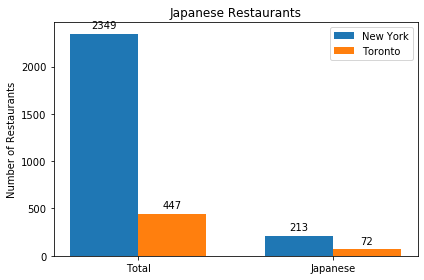

In [15]:
import matplotlib.pyplot as plt

labels = ['Total', 'Japanese']
data_ny = [len(ny_restaurants), len(ny_japanese_restaurants)]
data_tor = [len(tor_restaurants), len(tor_japanese_restaurants)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_ny, width, label="New York")
rects2 = ax.bar(x + width/2, data_tor, width, label="Toronto")

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('Cities')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Japanese Restaurants')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [16]:
print('New York - Total number of restaurants:', len(ny_restaurants))
print('New York - Total number of Japanese restaurants:', len(ny_japanese_restaurants))
print('New York - Percentage of Japanese restaurants: {:.2f}%'.format(len(ny_japanese_restaurants) / len(ny_restaurants) * 100))
print('New York - Average number of restaurants in neighborhood:', np.array([len(r) for r in ny_location_restaurants]).mean())   
print('')
print('Toronto - Total number of restaurants:', len(tor_restaurants))
print('Toronto - Total number of Japanese restaurants:', len(tor_japanese_restaurants))
print('Toronto - Percentage of Japanese restaurants: {:.2f}%'.format(len(tor_japanese_restaurants) / len(tor_restaurants) * 100))
print('Toronto - Average number of restaurants in neighborhood:', np.array([len(r) for r in tor_location_restaurants]).mean())

New York - Total number of restaurants: 2349
New York - Total number of Japanese restaurants: 213
New York - Percentage of Japanese restaurants: 9.07%
New York - Average number of restaurants in neighborhood: 5.928104575163399

Toronto - Total number of restaurants: 447
Toronto - Total number of Japanese restaurants: 72
Toronto - Percentage of Japanese restaurants: 16.11%
Toronto - Average number of restaurants in neighborhood: 4.233009708737864


# Part 5 - Results

By looking the numbers and the chart above, it is clear that New York city has more japanese restaurants than Toronto. And, we can also verify that New York has also more restaurants, in despite of the restaurant category. 

So, if you are a japanese-restaurant professional like a sushiman, it is more likely for you to find a job in New York city than Toronto. Of course, this study focused only in the number of japanese restaurants and it doesn't take in account another factos that may influence the chance of someone get a job or not or even get work VISA or not.



# Part 6 - Conclusion
And now this study comes to a conclusion where is was showed that New York city has more japanese restaurants than Toronto. And by consequence a more robust marketplace for restaurants under this japanese category as well as more opportunitis for travellers and local people to enjoy the fantastic japanese food.

But this study would not be complete if it was not listed all these restaurants in both cities. So, in tis last part of this study, it is presented two maps with markers showing all restaurants identified in this study. By clicking in the mark, you can see the restaurant name as well as its address. 

In [80]:
# get data from japanese restaurants in Toronto
df_ny_japanese_restaurants=pd.DataFrame(ny_japanese_restaurants).transpose()
df_ny_japanese_restaurants.columns=['id','Name', 'Latitude','Longitude', 'Address', 'Distance', 'is_japanese', '7', '8']
df_ny_japanese_restaurants.drop(['7', '8'], axis=1, inplace=True)
df_ny_japanese_restaurants.sort_values(by=['Distance'], inplace=True)
df_ny_japanese_restaurants.reset_index(drop=True, inplace=True)
print(df_ny_japanese_restaurants.shape)
#df_ny_japanese_restaurants.head()

(213, 7)


In [82]:
# draw a map of the japanese restaurants in NY
ny_map = folium.Map(location=[df_NYC['latitude'], df_NYC['longitude']], zoom_start=11)
for _, neigh in df_ny_japanese_restaurants.iterrows():
    #if neigh['Borough'] in colors.keys():
    folium.Marker(
        #popup=neigh['Neighbourhood'], parse_html=True,
        location=[neigh['Latitude'], neigh['Longitude']],    
        popup=folium.Popup(neigh['Name'] + ', ' + neigh['Address'], parse_html=True, max_width=120),
        icon=folium.Icon(color='blue')
    ).add_to(ny_map)
ny_map               

In [83]:
# get data from japanese restaurants in Toronto
df_tor_japanese_restaurants=pd.DataFrame(tor_japanese_restaurants).transpose()
df_tor_japanese_restaurants.columns=['id','Name', 'Latitude','Longitude', 'Address', 'Distance', 'is_japanese', '7', '8']
df_tor_japanese_restaurants.drop(['7', '8'], axis=1, inplace=True)
df_tor_japanese_restaurants.sort_values(by=['Distance'], inplace=True)
df_tor_japanese_restaurants.reset_index(drop=True, inplace=True)
print (df_tor_japanese_restaurants.shape)
#df_tor_japanese_restaurants.head()

(72, 7)


In [88]:
# draw a map of the japanese restaurants in Toronto
tor_map = folium.Map(location=[df_TOR['latitude'], df_TOR['longitude']], zoom_start=11)
for _, neigh in df_tor_japanese_restaurants.iterrows():
    #if neigh['Borough'] in colors.keys():
    folium.Marker(
        location=[neigh['Latitude'], neigh['Longitude']],    
        popup=folium.Popup(neigh['Name'] + ', ' + neigh['Address'], parse_html=True, max_width=120),
        icon=folium.Icon('orange')            
    ).add_to(tor_map)
tor_map   